In [ ]:
import kagglehub

path = kagglehub.dataset_download("prasad22/healthcare-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'healthcare-dataset' dataset.
Path to dataset files: /kaggle/input/healthcare-dataset


In [ ]:
import pandas as pd

csv_file_path = f"{path}/healthcare_dataset.csv"

df = pd.read_csv(csv_file_path)

print("First 5 rows of the DataFrame:")
print(df.head())

print("\n")
print("Data types of each column:")
print(df.info())

First 5 rows of the DataFrame:
            Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medi

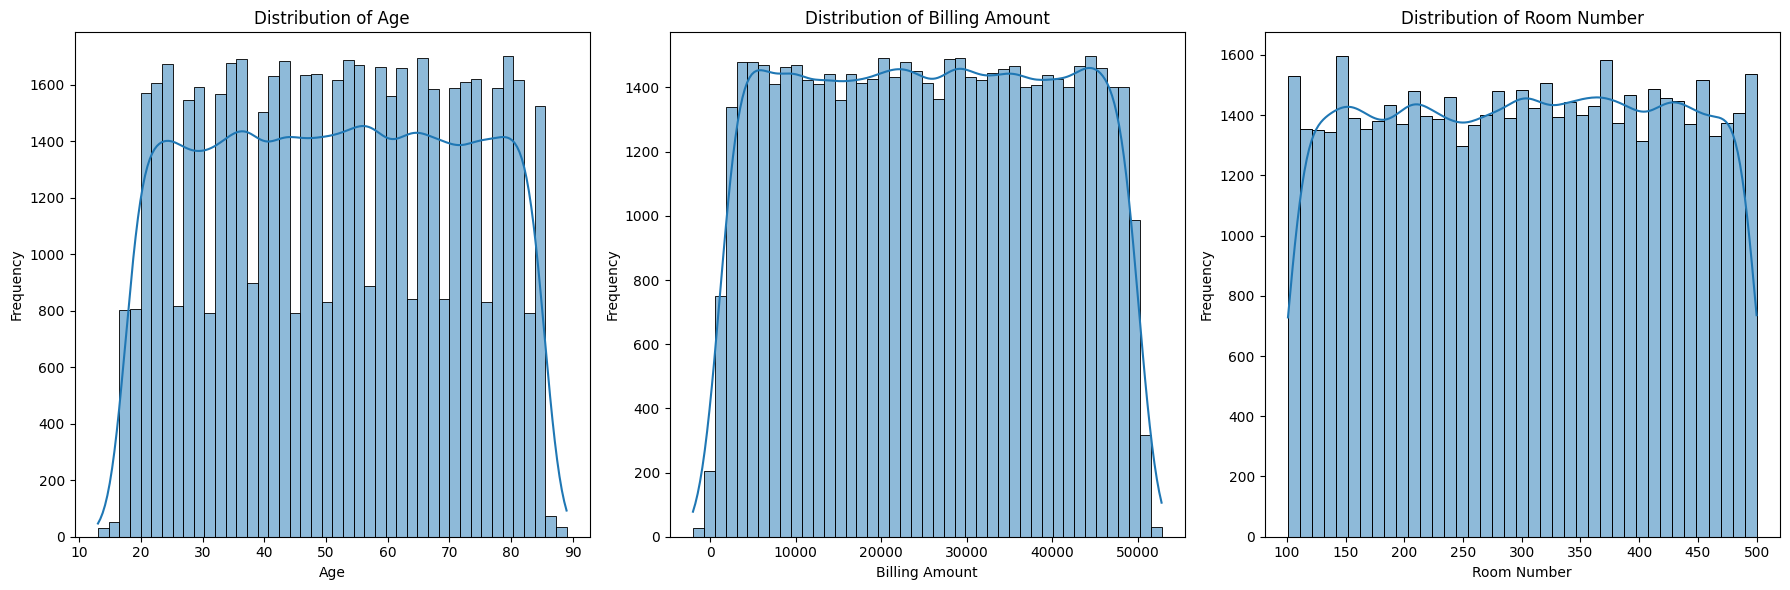

Generated and displayed distributions for 'Age', 'Billing Amount', and 'Room Number'.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

columns_to_plot = ['Age', 'Billing Amount', 'Room Number']

fig, axes = plt.subplots(1, len(columns_to_plot), figsize=(18, 6))

for i, col in enumerate(columns_to_plot):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()
print("Generated and displayed distributions for 'Age', 'Billing Amount', and 'Room Number'.")

## Task 1: EDA - Visualize Frequencies


/tmp/ipython-input-665113199.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], palette='viridis')
/tmp/ipython-input-665113199.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], palette='viridis')
/tmp/ipython-input-665113199.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, ax=axes[i], palette='viridis')


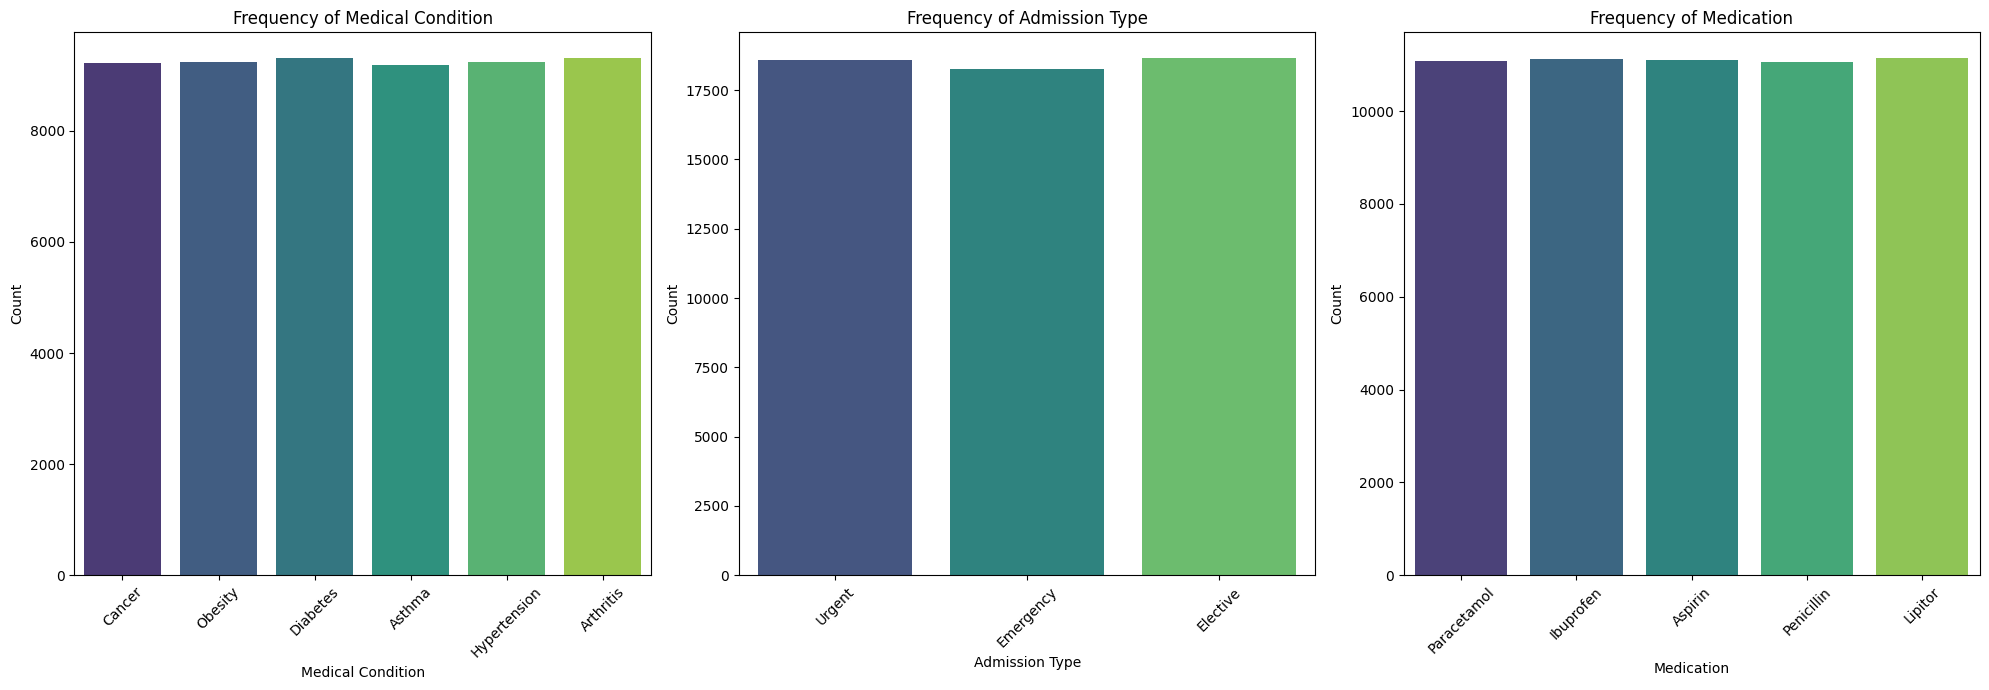

Generated and displayed frequency bar charts for 'Medical Condition', 'Admission Type', and 'Medication'.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_columns = ['Medical Condition', 'Admission Type', 'Medication']

fig, axes = plt.subplots(1, len(categorical_columns), figsize=(20, 7))

for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Frequency of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
print("Generated and displayed frequency bar charts for 'Medical Condition', 'Admission Type', and 'Medication'.")

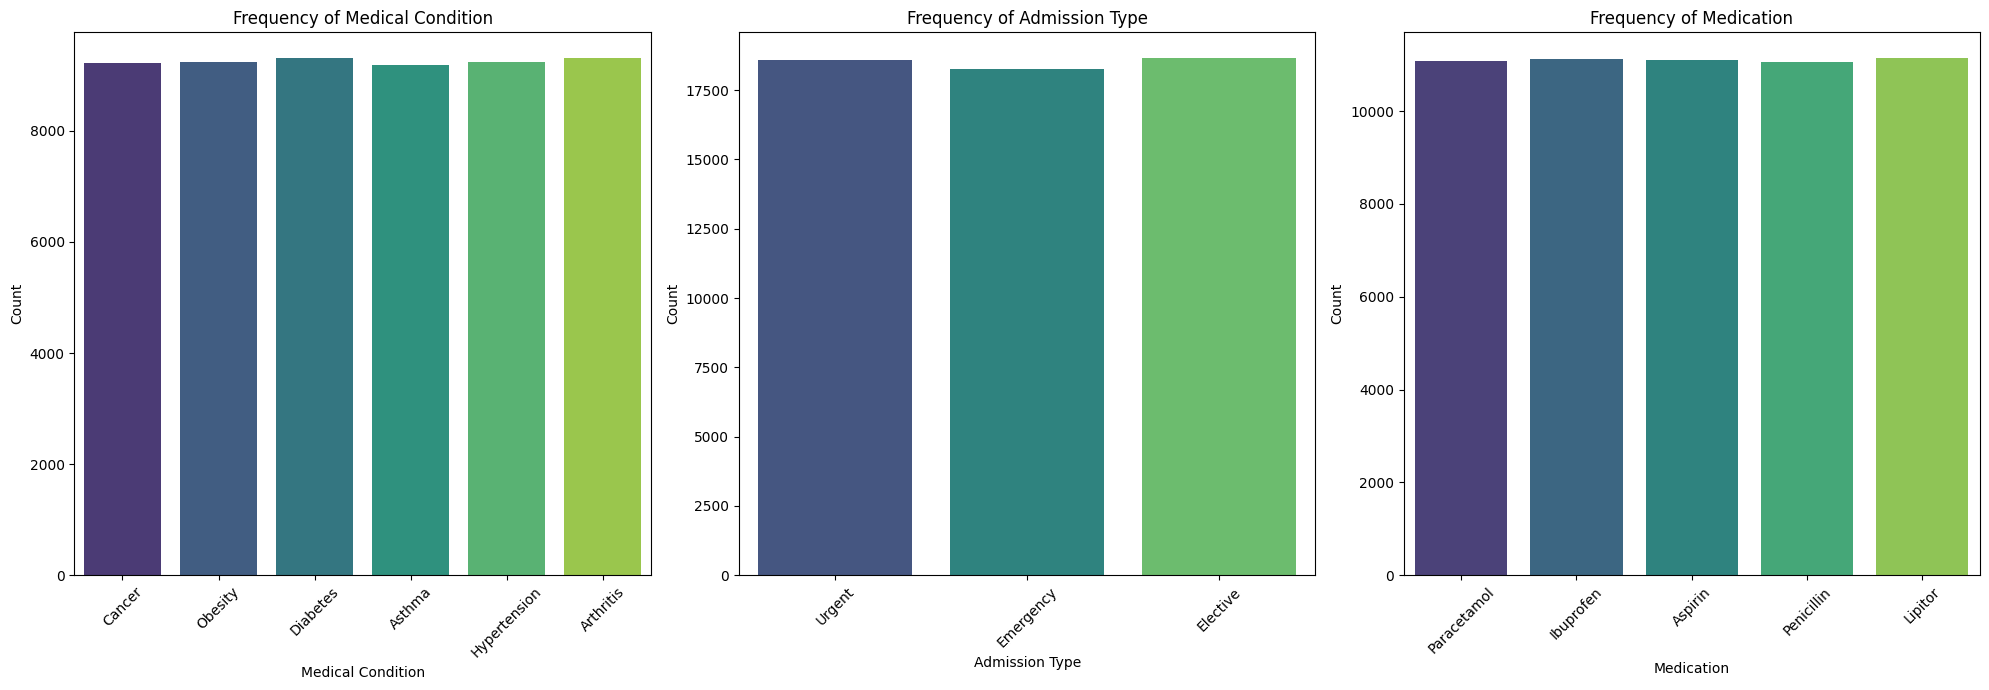

Generated and displayed frequency bar charts for 'Medical Condition', 'Admission Type', and 'Medication' (warning handled).


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

categorical_columns = ['Medical Condition', 'Admission Type', 'Medication']

fig, axes = plt.subplots(1, len(categorical_columns), figsize=(20, 7))

for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, ax=axes[i], palette='viridis', hue=col, legend=False)
    axes[i].set_title(f'Frequency of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
print("Generated and displayed frequency bar charts for 'Medical Condition', 'Admission Type', and 'Medication' (warning handled).")

## Task 2: Supervised Learning - Data Preparation



In [ ]:
import pandas as pd

df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])

df['Length of Stay'] = (df['Discharge Date'] - df['Date of Admission']).dt.days

print("Converted 'Date of Admission' and 'Discharge Date' to datetime and created 'Length of Stay'.")
print("First 5 rows with new 'Length of Stay' column:")
print(df[['Date of Admission', 'Discharge Date', 'Length of Stay']].head())

Converted 'Date of Admission' and 'Discharge Date' to datetime and created 'Length of Stay'.
First 5 rows with new 'Length of Stay' column:
  Date of Admission Discharge Date  Length of Stay
0        2024-01-31     2024-02-02               2
1        2019-08-20     2019-08-26               6
2        2022-09-22     2022-10-07              15
3        2020-11-18     2020-12-18              30
4        2022-09-19     2022-10-09              20


In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = df.select_dtypes(include='object').columns.tolist()

exclude_cols = ['Name', 'Doctor', 'Hospital', 'Insurance Provider', 'Test Results']
categorical_cols_to_encode = [col for col in categorical_cols if col not in exclude_cols]

df_encoded = pd.get_dummies(df, columns=categorical_cols_to_encode, drop_first=True)

le = LabelEncoder()
df_encoded['Test Results'] = le.fit_transform(df_encoded['Test Results'])

columns_to_drop = exclude_cols + ['Date of Admission', 'Discharge Date']
df_preprocessed = df_encoded.drop(columns=columns_to_drop)

print("Dataset preprocessed: Categorical columns one-hot encoded, 'Test Results' label encoded, and unnecessary columns dropped.")
print("\nFirst 5 rows of the preprocessed DataFrame:")
print(df_preprocessed.head())

print("\nData types of the preprocessed DataFrame:")
print(df_preprocessed.info())

Dataset preprocessed: Categorical columns one-hot encoded, 'Test Results' label encoded, and unnecessary columns dropped.

First 5 rows of the preprocessed DataFrame:
   Age  Billing Amount  Room Number  Length of Stay  Gender_Male  \
0   30    18856.281306          328               2         True   
1   62    33643.327287          265               6         True   
2   76    27955.096079          205              15        False   
3   28    37909.782410          450              30        False   
4   43    14238.317814          458              20        False   

   Blood Type_A-  Blood Type_AB+  Blood Type_AB-  Blood Type_B+  \
0          False           False           False          False   
1          False           False           False          False   
2           True           False           False          False   
3          False           False           False          False   
4          False            True           False          False   

   Blood Type_B-  ...

## Task 2: Supervised Learning - Split Dataset



In [ ]:
from sklearn.model_selection import train_test_split

X = df_preprocessed
y = df_encoded['Test Results']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dataset split into training and testing sets.")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Dataset split into training and testing sets.
Shape of X_train: (44400, 23)
Shape of X_test: (11100, 23)
Shape of y_train: (44400,)
Shape of y_test: (11100,)


In [ ]:
from sklearn.model_selection import train_test_split

X = df_preprocessed
y = df_encoded['Test Results']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dataset split into training and testing sets.")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Dataset split into training and testing sets.
Shape of X_train: (44400, 23)
Shape of X_test: (11100, 23)
Shape of y_train: (44400,)
Shape of y_test: (11100,)


## Task 2: Supervised Learning - Train and Evaluate Model



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model = RandomForestClassifier(random_state=42)
print("Training the RandomForestClassifier...")
model.fit(X_train, y_train)
print("Model training complete.")

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"\nModel Performance on Test Set:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Training the RandomForestClassifier...
Model training complete.

Model Performance on Test Set:
Accuracy: 0.4362
Precision: 0.4363
Recall: 0.4362
F1-Score: 0.4362


## Task 2: Supervised Learning - Display Predicted vs. Actual



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cm)

report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)
print("Displayed comparison of predicted vs. actual 'Test Results' using confusion matrix and classification report.")

Confusion Matrix:
[[1664 1051 1039]
 [1061 1543 1013]
 [1148  946 1635]]

Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.44      0.44      3754
           1       0.44      0.43      0.43      3617
           2       0.44      0.44      0.44      3729

    accuracy                           0.44     11100
   macro avg       0.44      0.44      0.44     11100
weighted avg       0.44      0.44      0.44     11100

Displayed comparison of predicted vs. actual 'Test Results' using confusion matrix and classification report.


## Task 3: Unsupervised Learning - Anomaly Detection



In [ ]:
from sklearn.ensemble import IsolationForest

model_if = IsolationForest(random_state=42, contamination='auto')

print("Fitting Isolation Forest model to 'Billing Amount'...")
model_if.fit(df[['Billing Amount']])
print("Model fitting complete.")

anomaly_predictions = model_if.predict(df[['Billing Amount']])
df['Billing_Anomaly'] = anomaly_predictions
df['Billing_Anomaly'] = df['Billing_Anomaly'].map({1: 'Normal', -1: 'Anomaly'})

print("Anomaly detection on 'Billing Amount' complete. Added 'Billing_Anomaly' column.")
print("First 5 rows with 'Billing_Anomaly' column:")
print(df[['Billing Amount', 'Billing_Anomaly']].head())

print("\nAnomaly distribution:")
print(df['Billing_Anomaly'].value_counts())

Fitting Isolation Forest model to 'Billing Amount'...
Model fitting complete.
Anomaly detection on 'Billing Amount' complete. Added 'Billing_Anomaly' column.
First 5 rows with 'Billing_Anomaly' column:
   Billing Amount Billing_Anomaly
0    18856.281306          Normal
1    33643.327287          Normal
2    27955.096079         Anomaly
3    37909.782410         Anomaly
4    14238.317814          Normal

Anomaly distribution:
Billing_Anomaly
Anomaly    30486
Normal     25014
Name: count, dtype: int64


## Task 3: Unsupervised Learning - Interpret Anomalies




In [ ]:
print("Descriptive statistics for 'Billing Amount' (Normal vs. Anomaly):")
print(df.groupby('Billing_Anomaly')['Billing Amount'].describe())

Descriptive statistics for 'Billing Amount' (Normal vs. Anomaly):
                   count          mean           std          min  \
Billing_Anomaly                                                     
Anomaly          30486.0  25645.282772  16801.544190 -2008.492140   
Normal           25014.0  25410.168418  10200.195099  9835.271788   

                          25%           50%           75%           max  
Billing_Anomaly                                                          
Anomaly           7699.671801  27321.275146  39974.324303  52764.276736  
Normal           16881.374485  25412.265710  31852.411555  44857.154142  


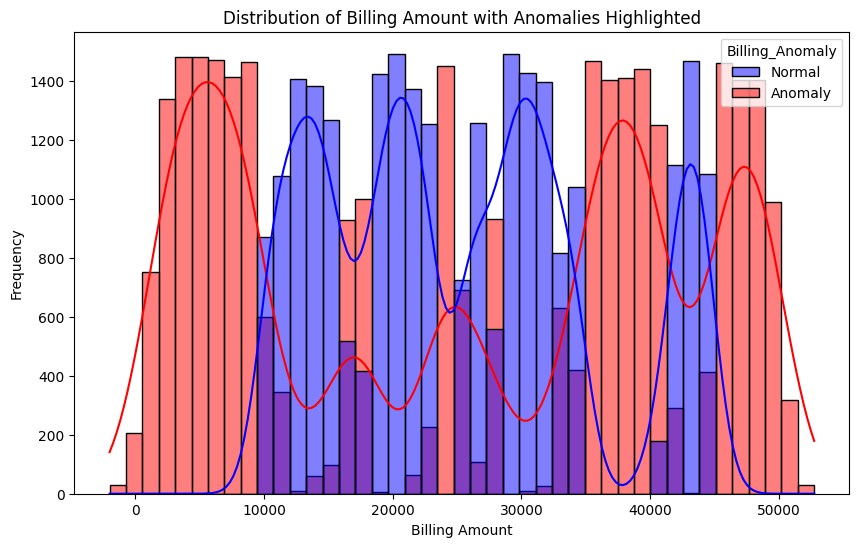

Visualized the distribution of 'Billing Amount' with anomalies highlighted.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Billing Amount', hue='Billing_Anomaly', kde=True, palette={'Normal': 'blue', 'Anomaly': 'red'})
plt.title('Distribution of Billing Amount with Anomalies Highlighted')
plt.xlabel('Billing Amount')
plt.ylabel('Frequency')
plt.show()
print("Visualized the distribution of 'Billing Amount' with anomalies highlighted.")

## Task 4: AI Task - Generate Doctor Recommendation



In [ ]:
import numpy as np
sample_patient_index_in_X_test = 0
sample_patient_original_index = X_test.index[sample_patient_index_in_X_test]
patient_age = df.loc[sample_patient_original_index, 'Age']
patient_medical_condition = df.loc[sample_patient_original_index, 'Medical Condition']
patient_medication = df.loc[sample_patient_original_index, 'Medication']

predicted_test_result_encoded = y_pred[sample_patient_index_in_X_test]
predicted_test_result = le.inverse_transform([predicted_test_result_encoded])[0]

recommendation_text = f"""Patient Recommendation Summary:

Patient Details:
- Age: {patient_age} years old
- Medical Condition: {patient_medical_condition}
- Current Medication: {patient_medication}

Predicted Test Result: {predicted_test_result}

Doctor's Recommendation:
Based on the predicted test result of '{predicted_test_result}', here is some health advice:
"""

if predicted_test_result == 'Normal':
    recommendation_text += "- Your test results are within normal limits. Continue to maintain a healthy lifestyle including balanced nutrition, regular exercise, and adequate sleep. Follow up with your primary care physician for routine check-ups."
elif predicted_test_result == 'Abnormal':
    recommendation_text += "- Your test results indicate an abnormal finding. It is strongly recommended that you schedule a follow-up consultation with a specialist for further evaluation and discussion of these results. Additional diagnostic tests may be necessary to determine the cause and appropriate course of action."
elif predicted_test_result == 'Inconclusive':
    recommendation_text += "- Your test results are inconclusive, meaning they do not provide a clear diagnosis. We recommend repeating the tests or undergoing further specific diagnostic procedures to obtain a definitive result. Please discuss this with your doctor to plan the next steps."

print(recommendation_text)
print("Generated a sample AI-driven doctor recommendation.")

Patient Recommendation Summary:

Patient Details:
- Age: 57 years old
- Medical Condition: Diabetes
- Current Medication: Aspirin

Predicted Test Result: Abnormal

Doctor's Recommendation:
Based on the predicted test result of 'Abnormal', here is some health advice:
- Your test results indicate an abnormal finding. It is strongly recommended that you schedule a follow-up consultation with a specialist for further evaluation and discussion of these results. Additional diagnostic tests may be necessary to determine the cause and appropriate course of action.
Generated a sample AI-driven doctor recommendation.
